In [591]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [592]:
df=pd.read_csv('Life Expectancy Data.csv')

In [593]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


# Part 1 - EDA

In [594]:
df.shape

(2938, 22)

In [595]:
df.dtypes

,0
Country,object
Year,int64
Status,object
Life expectancy,float64
Adult Mortality,float64
infant deaths,int64
Alcohol,float64
percentage expenditure,float64
Hepatitis B,float64
Measles,int64


In [596]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [597]:
df.isnull().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,10
Adult Mortality,10
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0


In [598]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


Text(0.5, 1.0, 'Target Variable Distribution')

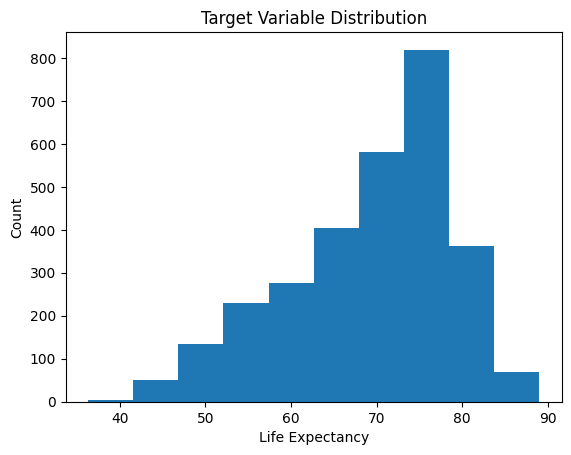

In [599]:
plt.hist(df['Life expectancy '])
plt.xlabel('Life Expectancy')
plt.ylabel('Count')
plt.title('Target Variable Distribution')

Observations:
- Most values lie between around 65 to 80.
- Distribution is left skewed
- Target variable is continuous and well distributed, hence suitable for regression problems
- Data is unevenly distributed with more observations having higher life expectancy and very few having lower life expectancy (below 50)



In [600]:
num=df.select_dtypes(include='number')

In [601]:
corr_matrix=num.corr()

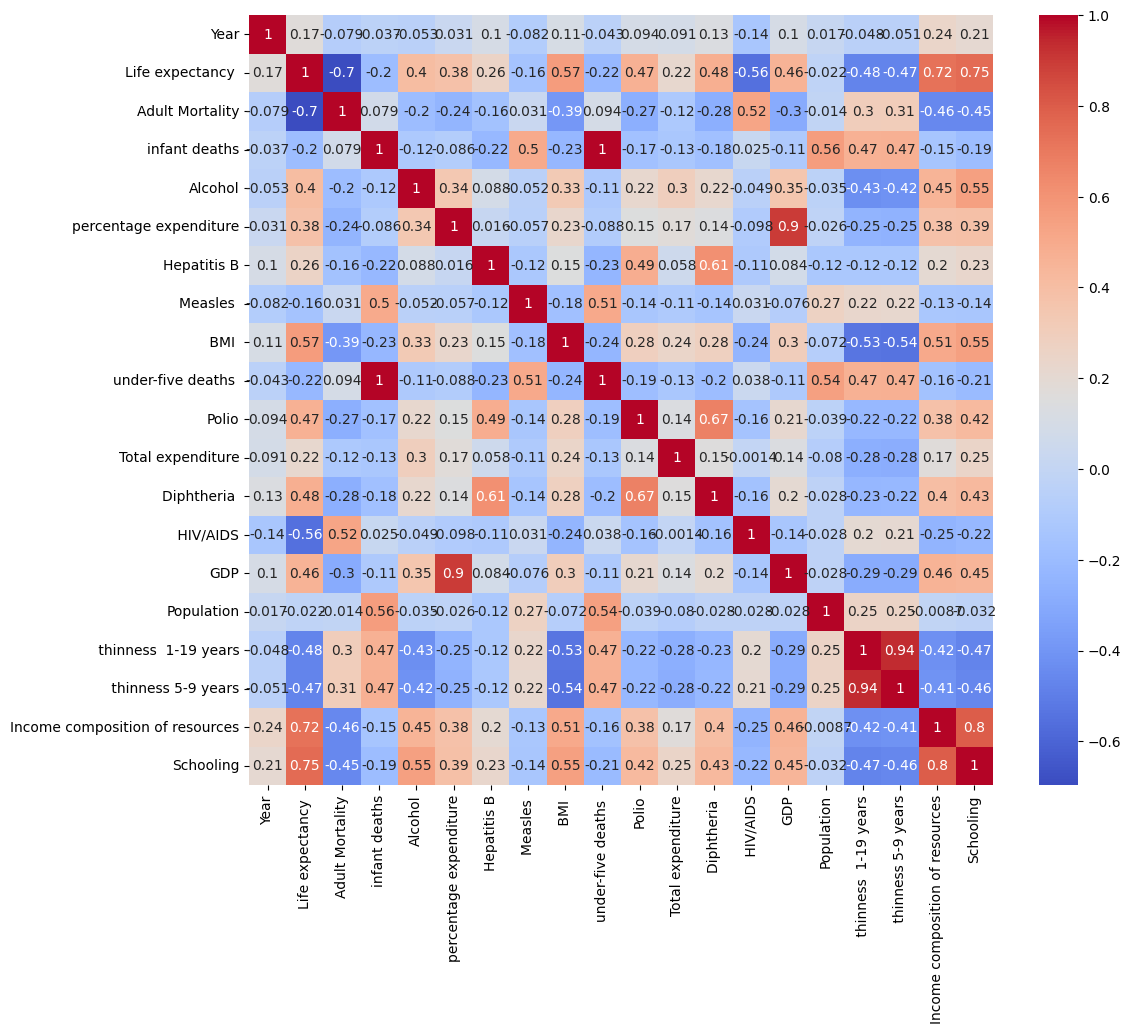

In [602]:
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.show()

Observations:
- Strong positive correlation with target variable Life Expectancy
  - Schooling : 0.75
  - Income composition of resources : 0.72
  - GDP : 0.46
  - Diptheria : 0.48
  - Polio : 0.47
  - BMI : 0.57
- Strong negative correlations with life expectancy
  - thinness 5-9 years : -0.47
  - thinness 1-19 years : -0.48
  - HIV/AIDS : -0.56
  - Adult mortality : -0.7

Text(0.5, 1.0, 'Detecting Outliers in Life Expectancy')

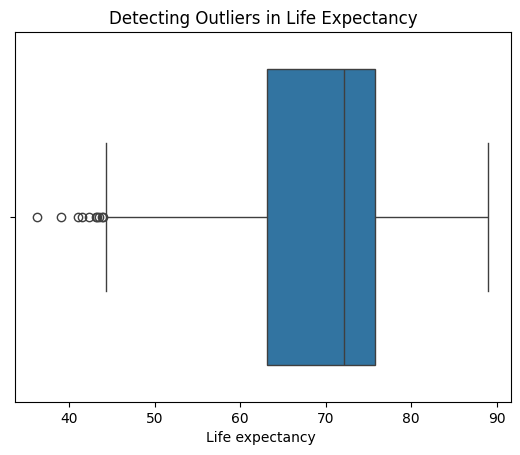

In [603]:
sns.boxplot(x=df['Life expectancy '])
plt.title('Detecting Outliers in Life Expectancy')

Observations
- Median of Life expectancy is around 72-73 years
- IQR lies between around 62-63 years and 76-77 years
- Several outliers are present below 45 which represent unusually low life expectancy. These outliers affect linear regression models hence it is needed to deal with them.


# Part 2 - Preprocessing and Data Split


In [604]:
df.isnull().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,10
Adult Mortality,10
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0


In [605]:
df.isnull().mean()*100

,0
Country,0.000000
Year,0.000000
Status,0.000000
Life expectancy,0.340368
Adult Mortality,0.340368
infant deaths,0.000000
Alcohol,6.603131
percentage expenditure,0.000000
Hepatitis B,18.822328
Measles,0.000000


In [606]:
#10 vals missing in Life expectancy col, so we drop those rows instead of imputing because it would be risky to guess the value of target variable.
#also 10 vals only makes up 0.34% of total values hence it is okay to drop
df.columns=df.columns.str.strip()#remove trailing spaces in col names
df.dropna(subset=['Life expectancy'],inplace=True)

In [607]:
df['Adult Mortality'].isnull().sum()

np.int64(0)

In [608]:
df.isna().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,0
Adult Mortality,0
infant deaths,0
Alcohol,193
percentage expenditure,0
Hepatitis B,553
Measles,0


In [609]:
df['Alcohol']

,Alcohol
0,0.01
1,0.01
2,0.01
3,0.01
4,0.01
...,...
2933,4.36
2934,4.06
2935,4.43
2936,1.72


In [610]:
#alcohol col -193 missing cols which is too much to be dropped as we could miss out on imp data
#this col records per capita alcohol consumption (15+) in litres.
#hence i have taken the mean grouped by country and replaced missing values of the col based on the mean alcohol consumption of the particular country
df['Alcohol']=df['Alcohol'].fillna(df.groupby('Country')['Alcohol'].transform('mean'))

In [611]:
df.isna().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,0
Adult Mortality,0
infant deaths,0
Alcohol,16
percentage expenditure,0
Hepatitis B,553
Measles,0


In [612]:
#still 16 vals missing in alcohol col, this is because some countries may have all values missing and hence we cant impute the mean for that country
#in this case, i have just replaced NAN with mean of entire alcohol column
#did it for all applicable cols
cols_country_mean = [
    'Alcohol','Hepatitis B','BMI','Polio','Diphtheria','Total expenditure','GDP','Income composition of resources',
    'Schooling','thinness  1-19 years','thinness 5-9 years'
]
for col in cols_country_mean:
    df[col]=df[col].fillna(df.groupby('Country')[col].transform('mean'))
    df[col]=df[col].fillna(df[col].mean())

In [613]:
df.isna().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,0
Adult Mortality,0
infant deaths,0
Alcohol,0
percentage expenditure,0
Hepatitis B,0
Measles,0


In [614]:
#Population cannot be replaced with mean of country
#so we use forward fill which replaces NAN with population of country from previous year or backward fill which replaces with next year
df['Population']=df.groupby('Country')['Population'].transform(lambda x: x.ffill().bfill())

In [615]:
df.isna().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,0
Adult Mortality,0
infant deaths,0
Alcohol,0
percentage expenditure,0
Hepatitis B,0
Measles,0


In [616]:
#dropping population col because it shows almost no impact on life expectancy (0.02)
df.drop(columns=['Population'],inplace=True)

In [617]:
df.dtypes

,0
Country,object
Year,int64
Status,object
Life expectancy,float64
Adult Mortality,float64
infant deaths,int64
Alcohol,float64
percentage expenditure,float64
Hepatitis B,float64
Measles,int64


In [618]:
df['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

In [619]:
df['Status']=df['Status'].map({'Developing':0,'Developed':1}) #encoding categorical col Status

In [620]:
df['Country'].nunique()

183

In [621]:
df.drop(columns=['Country'],inplace=True)
#dropped country because OHE will create additional 182 cols and life expectancy does not depend on name of country
#rather cols like gdp and status are more imp and can be used

In [622]:
X=df.drop(columns=['Life expectancy'])
y=df['Life expectancy']

In [623]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1234)

In [624]:
#using RobustScaler due to presence of outliers in Life Expectancy col
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()

In [625]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

Why chosen imputation and encoding methods suit this dataset?
Grouped by mean of country to fill missing data. This helps preserve the profile of a particular nation. It is more accurate to fill missing data using existing data of nation rather than the entire data. If no data present for particular nation, then we use global mean.


For encoding, Binary encoding was used for Status column. I chose to drop the Country column because OHE would add another 182 columns, which would lead to Curse of Dimensionality and risk of overfitting.

Whether scaling changes feature dominance - Scaling doesnt change the feature dominance but balances out the importance of features. A feature like population, which is in millions, would be considered as more important than a feature like BMI, which would be inaccurate.

One concrete data-leakage risk in this dataset and how it was avoided.
One could be if we used RobustScaler before splitting data into train and test sets, it would lead to the model getting to know the median of data and hence distribution of dataset. Distributed into train and test, performed fit and transform of training set and only transformed test set, which is treated as unseen data.

In [626]:
df.isnull().sum()

,0
Year,0
Status,0
Life expectancy,0
Adult Mortality,0
infant deaths,0
Alcohol,0
percentage expenditure,0
Hepatitis B,0
Measles,0
BMI,0


#Part 3 Supervised learning (from scratch + baseline)

In [627]:
class LinearRegression:
    def __init__(self,lr,epochs):
        self.lr = lr
        self.epochs=epochs
        self.weights=None
        self.bias=None

    def fit(self,X,y):
        n_samples,n_features=X.shape
        self.weights=np.zeros(n_features)
        self.bias=0

        for _ in range(self.epochs):
            y_pred=np.dot(X,self.weights)+self.bias

            dw=(1/n_samples)*np.dot(X.T,(y_pred-y))
            db=(1/n_samples)*np.sum(y_pred-y)

            self.weights-=self.lr*dw
            self.bias-=self.lr*db

    def predict(self,X):
        return np.dot(X,self.weights)+self.bias


In [628]:
def mse(y_true,y_pred):
  return np.mean((y_true-y_pred)**2)

In [629]:
model = LinearRegression(lr=0.002,epochs=10000)

In [630]:
model.fit(X_train,y_train.values)

In [631]:
y_pred=model.predict(X_test)

In [632]:
mse(y_test.values,y_pred)

np.float64(15.798817532994724)

In [633]:
from sklearn.linear_model import LinearRegression as sklearnLR
sklearn_model=sklearnLR()
sklearn_model.fit(X_train,y_train)
sklearn_ypred=sklearn_model.predict(X_test)

In [634]:
mse(y_test,sklearn_ypred)

np.float64(15.353923768849944)

**Effect of algorithm assumptions on results**

Manual implementation of Linear Regression uses Gradient Descent logic.

Linear Regression assumes a linear relationship between predictors and life expectancy. This works well for cols such as Schooling, income decomposition and BMI which show almost linear trends with Life expectancy. However some cols like Measles are non linear, which limits the models performance.

Multicollinearity exists such as in schooling, income decomposition of resources. Gradient Descent still converges, but coefficients become less interpretable because GD might split the importance between the two variables and hence learning slows slightly.

**Sensitivity to parameters (e.g., k, learning rate)**

A small learning rate of 0.002 was required. If it is too high, gradients explode i.e. updates to weights are such that model moves further away from minimum rather than close to it. At some point the weight values may get so large that computer cant store them, resulting in NaN errors. If the learning rate, is too low, then a large number of iterations would be required. This would waste time and instead we could choose a larger learning rate to do the same thing quicker. Hence, I arrived at the optimal learning rate of 0.002.

**Where and why errors occur (at least one concrete example)**

Errors occur with countries with very low life expectancy of less than 50. The model overpredicts life expectancy for such countries. Linear Regression finds the line of best fit for majority of data, which in this case consists of life expectancy ranging from 65 to 80. This line sits too high for the lower end outliers having life expectancy of around 50 and hence, the model overpredicts life eexpectancy in such cases.


#Part 4: Unsupervised learning & reflection

In [635]:
X_unsup=df.drop(columns=['Life expectancy']).values

In [636]:
#standard scaler used to scale data because K Means is distance based
from sklearn.preprocessing import StandardScaler
scaler_unsup=StandardScaler()
X_scaled_unsup=scaler_unsup.fit_transform(X_unsup)

In [637]:
def euclidean_distance(x1,x2):
  return np.sqrt(np.sum((x1-x2)**2))

In [638]:

class K_means:
    def __init__(self, K=5, max_iters=100, plot_steps=False):
        self.K = K
        self.max_iters = max_iters
        self.plot_steps = plot_steps

        self.clusters = [[] for _ in range(self.K)]
        self.centroids = []

    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape

        #initialise centroids randomly
        random_indices = np.random.choice(self.n_samples, self.K, replace=False)
        self.centroids = np.array([self.X[index] for index in random_indices])

        #optimization
        for _ in range(self.max_iters):

            # Assign samples to clusters
            self.clusters = self.create_clusters(self.centroids)

            #store old centroids to check for convergence
            centroids_old = self.centroids.copy()

            #update centroids
            self.centroids = self.get_centroids(self.clusters)

            #check for convergence
            if self.is_converged(centroids_old, self.centroids):
                break

        #return labels
        return self.get_cluster_labels()

    def create_clusters(self, centroids):
        clusters = [[] for _ in range(self.K)]

        for idx, sample in enumerate(self.X):
            centroid_idx = self.closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)

        return clusters

    def closest_centroid(self, sample, centroids):
        distances = [euclidean_distance(sample, centroid) for centroid in centroids]
        return np.argmin(distances)

    def get_centroids(self, clusters):
        centroids = np.zeros((self.K, self.n_features))

        for idx, cluster in enumerate(clusters):
            if len(cluster) == 0:
                # Reinitialize centroid if cluster is empty
                centroids[idx] = self.X[np.random.choice(self.n_samples)]
            else:
                centroids[idx] = np.mean(self.X[cluster], axis=0)

        return centroids

    def is_converged(self, old_centroids, new_centroids):
        distances = [
            euclidean_distance(old_centroids[i], new_centroids[i])
            for i in range(self.K)
        ]
        return sum(distances) < 1e-6

    def get_cluster_labels(self):
        labels = np.empty(self.n_samples, dtype=int)

        for cluster_idx, cluster in enumerate(self.clusters):
            for sample_idx in cluster:
                labels[sample_idx] = cluster_idx

        return labels


In [639]:
kmeans=K_means(K=3)

In [640]:
labels=kmeans.predict(X_scaled_unsup)

In [641]:
df['Cluster']=labels
df.groupby('Cluster').mean(numeric_only=True)

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Cluster,,,,,,,,,,,,,,,,,,,,
0,2006.518987,0.000000,59.065823,262.655063,78.535865,2.510395,86.706153,62.707467,5983.919831,21.490460,111.347046,63.488005,5.110900,62.670283,4.762764,1888.749483,8.470007,8.547467,0.438490,8.860421
1,2008.138810,0.002833,71.970822,133.743626,9.737960,3.919424,321.564307,87.853633,819.363314,43.704870,11.997167,90.576204,5.793737,90.650142,0.386261,5263.797816,3.851171,3.875076,0.670783,12.678527
2,2007.549296,0.894366,79.354577,78.663732,1.463028,9.841854,2872.208091,82.416301,491.311620,52.586268,1.767606,93.607394,7.550347,93.690141,0.100000,21852.386188,1.294366,1.264437,0.834942,15.551378


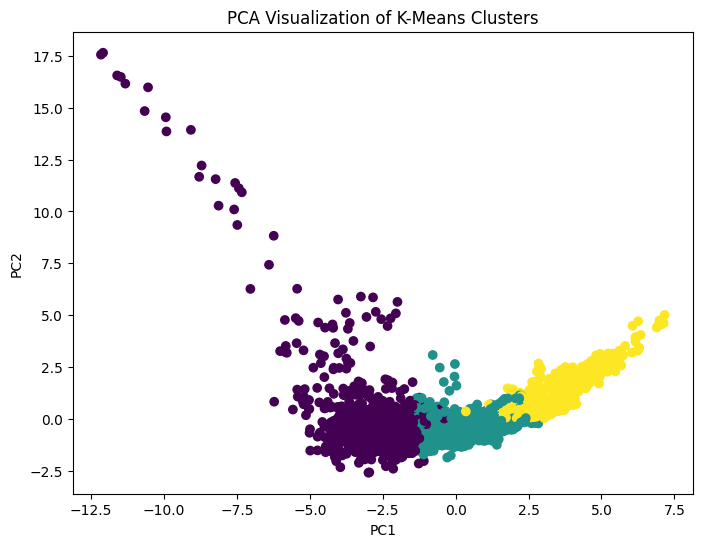

In [642]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
X_pca=pca.fit_transform(X_scaled_unsup)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=df['Cluster'])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Visualization of K-Means Clusters")
plt.show()

Using K means clustering, we get 3 separable clusters in the data, which can be seen in the PCA Visualization.



In [643]:
#getting PCA components
components=pd.DataFrame(pca.components_,columns=X.columns,index=['PC1','PC2'])

#top features for PC1
print("Top features contributing to PC1:")
print(components.loc['PC1'].sort_values(ascending=False).head(5))

#top features for PC2
print("\nTop features contributing to PC2:")
print(components.loc['PC2'].sort_values(ascending=False).head(5))

Top features contributing to PC1:
Schooling                          0.322769
Income composition of resources    0.302977
BMI                                0.273326
Status                             0.256403
Alcohol                            0.244599
Name: PC1, dtype: float64

Top features contributing to PC2:
infant deaths             0.508005
under-five deaths         0.504789
Measles                   0.357599
percentage expenditure    0.260611
GDP                       0.256991
Name: PC2, dtype: float64


The top contributors to PC1 are Schooling, Income composition of resources, BMI, and Status. So, PC1 represents a country's long term structural development.

The top contributors to PC2 are Infant deaths, under-five deaths and Measles. PC2 represents public health vulnerability.

Hence in PCA visualization, we can see that:
1.   Violet indicates underdeveloped or developing nations (low PC1) with a higher health risk (high PC2). These are highest risk nations which have lowest life expectancy (mean of 59.02).
2.   Teal indicates moderately developed nations (medium PC1) with low health risk (low PC2). This shows that as a country develops socio-economically, the mortality rates were reduced. Life expectancy in this cluster also increases to a mean of 71.98.
3.   Yellow indicates nations that are highly developed (highest PC1 score). The result of this is that the cluster has the highest life expectancy, with a mean of 79.35.



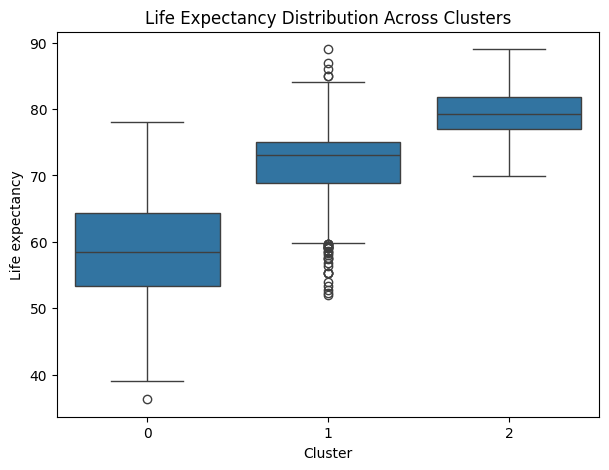

In [644]:
plt.figure(figsize=(7,5))
sns.boxplot(x='Cluster', y='Life expectancy', data=df)
plt.title("Life Expectancy Distribution Across Clusters")
plt.show()

**Structure revealed by clustering/dimensionality reduction**

*   K means clustering gives us 3 clearly separable groups
*   PCA visualization shows us that PC1 provides clear separation between the 3 clusters, showing that major variance is based on the countr's socio-economal and health development levels.
*   Continuous change from one cluster to another, showing progressive change in change in features and not sudden change.



**Alignment (or lack thereof) with known labels, if available**

No known labels because Status is used during clustering and Life Expectancy is the target variable.


**How unsupervised insights could help supervised modeling**

From PCA, it is evident that PC1 (Schooling, Income composition of resources, BMI, Status) explains the highest variance and PC2 (Infant deaths, Under-five deaths, Measles) explains the next largest variance. Hence, we can focus on these factors while building our regression model and drop other features with very low variance, which simplifies model and reduces noise

We can introduce the new cluster labels formed as a result of K Means. This would allow us to create a different baseline for each cluster and the predictions would be much more accurate, especially for outliers. It would reduct the problem of overprediction of outliers that we faced as a result of Gradient Descent.

**Reflection**

**Two failure cases of the supervised model**
1.  overprediction for low life expectancy countries
    
    As discussed already, due to line of best fit adjusted for the majority of data.

2. **Three questions you expect in the 1:1 discussion (with short answers)**

    Q: Why did you choose RobustScaler for supervised learning but StandardScaler for K-Means?

    A: For regression, outliers in Life Expectancy can skew learning, so RobustScaler prevents extreme values from dominating. For K-Means, all features must contribute proportionally, and StandardScaler centers features, making Euclidean distances meaningful for clustering.

    Q: How could clustering insights improve your regression model?

    A: We can use the cluster each country belongs to as an extra feature. This lets the model adjust predictions for different groups, helping it handle patterns that aren’t perfectly straight lines and differences between countries.

    Q: Why did you drop the Population column, and could it have helped the model?

    A: Population had almost no correlation with Life Expectancy (0.02). Including it could add noise and reduce model performance, so dropping it simplified the model without losing predictive power.



